In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

In [11]:

fle = "/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/2016_10_19__11_23_51_424_220_450_test.txt"

exx = np.transpose(pd.read_csv(fle, sep = " ", header = None))

In [12]:
exx.head()

,0,1
0,0.000000,-0.014654
1,0.000005,-0.015952
2,0.000010,-0.015628
3,0.000015,-0.014654
4,0.000020,-0.015303


In [13]:
len(exx)

20000

In [14]:

data = np.array(exx.loc[:,1])

log_rate = 200000.0

n =len(data) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(data)/n # fft computing and normalization
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

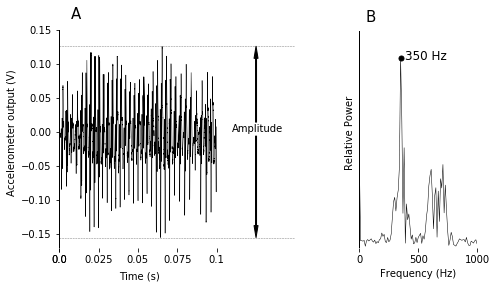

In [78]:
plt.figure(figsize=(7,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 

# create subplot 1
ax1 = plt.subplot(gs[0])
ax1.plot(np.array(range(len(exx)))/ float(log_rate), data,color = 'black', linewidth=0.5 )
ax1.set_ylabel("Accelerometer output (V)")
ax1.set_xlabel("Time (s)")
ax1.set_frame_on(False)
ax1.axhline(y=np.max(data), color='grey', linestyle='--', linewidth = 0.5)
ax1.axhline(y=np.min(data), color='grey', linestyle='--', linewidth = 0.5)
ax1.set_xlim(-0.0002, 0.15)
ax1.set_ylim(-0.17, 0.17)

ax1.annotate(' ', xy=(0.125, np.min(data)), xytext=(0.125, 0),
            arrowprops=dict(facecolor='black', width = 1, headwidth = 4)
            )
ax1.annotate(' ', xy=(0.125, np.max(data)), xytext=(0.125, 0),
            arrowprops=dict(facecolor='black', width = 1, headwidth = 4)
            )

ax1.annotate('Amplitude', xy=(0.11, np.min(data)), xytext=(0.11, 0)
            )
ax1.plot([0,0.1], [ax1.get_ylim()[0], ax1.get_ylim()[0]], 'black', linewidth = 1)
ax1.plot([ax1.get_xlim()[0],ax1.get_xlim()[0]], [ax1.get_ylim()[0], 0.15], 'black', linewidth = 1)
# add "L" shaped borders
#ax1.axvline(x = ax1.get_xlim()[0], linewidth = 1, color = 'black')
#ax1.axhline(y = ax1.get_ylim()[0], linewidth = 1, color = 'black')
ax1.axes.xaxis.set_ticklabels([0.000, 0.000,  0.025, 0.05, 0.075, 0.100])
ax1.axes.xaxis.set_ticks([0.000, 0.000,  0.025, 0.05, 0.075, 0.100])
ax1.xaxis.set_label_coords(0.342, -0.1)


def get_axis_limits(ax, scale=.98):
    return ax.get_xlim()[0] + np.diff(ax.get_xlim())*0.05, ax.get_ylim()[1]*scale     

# create subplot 2
ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)
ax2.annotate('350 Hz', xy=(domPK, beeFrqPwr), xytext=(domPK + 40, beeFrqPwr- 0.0001), size = 12
            )
ax2.set_xlim(-3, 1003)
ax2.set_ylabel('Relative Power')
ax2.set_xlabel('Frequency (Hz)')
plt.tight_layout()
ax2.set_frame_on(False)
ax2.axes.yaxis.set_ticklabels([])
ax2.axes.yaxis.set_ticks([])
ax2.set_ylim(0, 0.013)

# add "L" shaped borders
#ax2.axvline(x = ax2.get_xlim()[0], linewidth = 1, color = 'black')
ax2.plot([ax2.get_xlim()[0],ax2.get_xlim()[0]], [ax2.get_ylim()[0], 0.0122], 'black', linewidth = 1)
#ax2.axhline(y = ax2.get_ylim()[0], linewidth = 1, color = 'black')
ax2.plot([0,1500], [ax2.get_ylim()[0], ax2.get_ylim()[0]], 'black', linewidth = 1)


plt.savefig("/Users/cswitzer/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum_noAnnot.pdf", width = 7, height = 1.5)
ax1.annotate('A', xy=get_axis_limits(ax1), size = 15)
ax2.annotate('B', xy=get_axis_limits(ax2), size = 15)

plt.savefig("/Users/cswitzer/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum.pdf", width = 7, height = 1.5)
plt.show()

In [79]:
print(np.max(data), np.min(data))
print(np.max(data) - np.min(data))

0.126176925653 -0.155160770608
0.281337696261


In [80]:
# print system info
import IPython
print(IPython.sys_info())

{'commit_hash': '5a894b9',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/Users/cswitzer/anaconda/envs/python3/lib/python3.6/site-packages/IPython',
 'ipython_version': '5.3.0',
 'os_name': 'posix',
 'platform': 'Darwin-17.3.0-x86_64-i386-64bit',
 'sys_executable': '/Users/cswitzer/anaconda/envs/python3/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, '
                '13:04:09) \n'
                '[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]'}


In [81]:
# convert to html, so ppl don't have to run python to see code
!jupyter nbconvert --to html 008_ExampleFigureSpectrum

[NbConvertApp] Converting notebook 008_ExampleFigureSpectrum.ipynb to html
[NbConvertApp] Writing 316061 bytes to 008_ExampleFigureSpectrum.html
